# Predict number of upvotes
Crowdsourced online content platforms have a constant need to identify the best content in time to appropriately promote and thereby improve the engagement at the website. This challenge involves a similar problem of predicting the upvote count for a queries posted and identify the parameters that affect it the most.

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


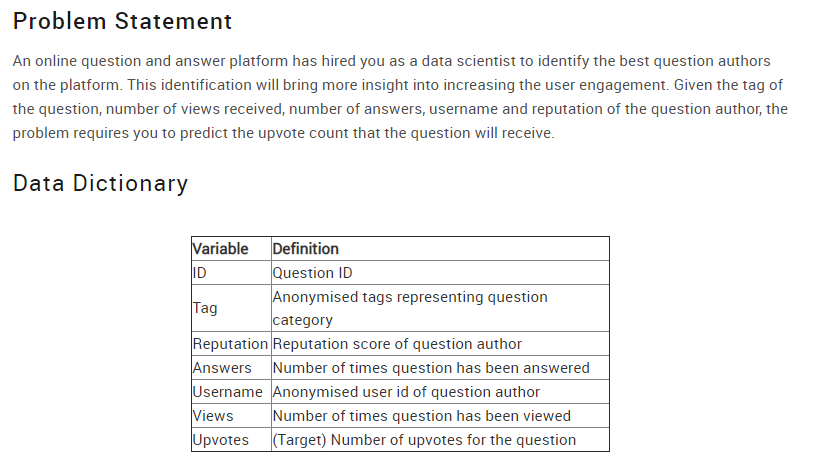

In [4]:
from IPython.display import Image
Image('data_desc.png',width=700,height=400)

In [182]:
# Loading Train data
train=pd.read_csv('train_NIR5Yl1.csv')
print(train.shape)
train.head()

(330045, 7)


,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [183]:
# Loading Test Data
test=pd.read_csv('test_8i3B3FC.csv')
print(test.shape)
test.head()

(141448, 6)


,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [185]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [186]:
# Null Values Check:
print(train.isnull().sum())
print(test.isnull().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64
ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64


In [187]:
# No Null Values in Train and Test Data!

In [188]:
train.nunique()

ID            330045
Tag               10
Reputation     16527
Answers           63
Username      141802
Views          82137
Upvotes         7239
dtype: int64

In [189]:
# Data doesn't contain any null values, Thus Null value imputation not required!
# Just checking for Tag column since its data type is object, thus it may contain invalid characters
train['Tag'].unique() # No invalid Characters!

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

ID  Vs Upvotes


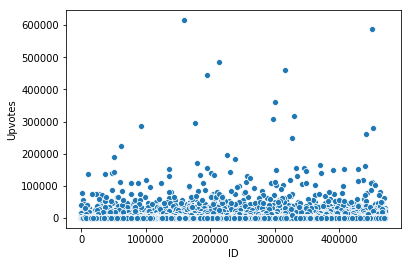

Reputation  Vs Upvotes


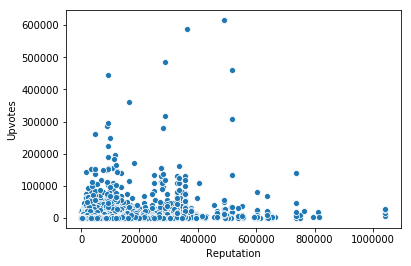

Answers  Vs Upvotes


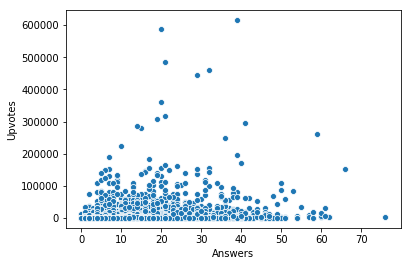

Username  Vs Upvotes


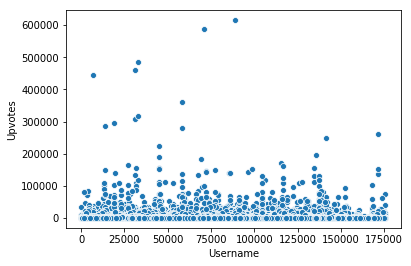

Views  Vs Upvotes


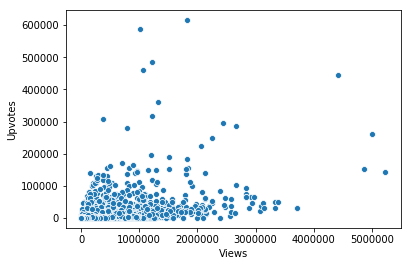

Upvotes  Vs Upvotes


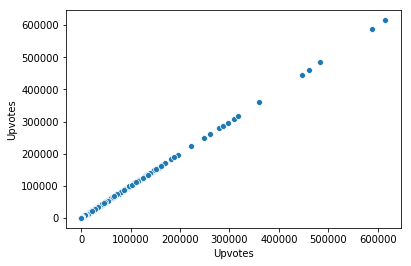

In [94]:
num_cols=train.select_dtypes(exclude='object').columns
for i in range(0,len(num_cols)):
    print(num_cols[i],' Vs Upvotes')
    sns.scatterplot(train[num_cols[i]],train['Upvotes'])
    plt.show()

In [13]:
# Highly right skewed data.. Outlier Treatement is required!!

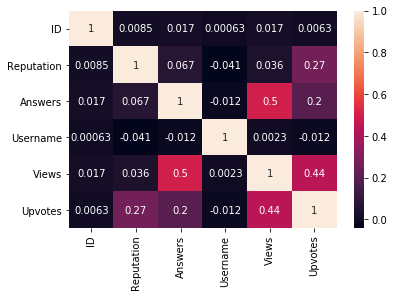

In [155]:
sns.heatmap(train.corr(),annot=True);

### Encoding 'Tag' :

In [190]:

name=train.groupby('Tag')['Upvotes'].median().sort_values()
name

Tag
r    11.0
x    13.0
s    16.0
o    17.0
h    20.0
i    20.0
p    30.0
c    33.0
a    35.0
j    42.0
Name: Upvotes, dtype: float64

In [191]:
encoder=dict(zip(name.index,range(0,10)))
train['Tag_encoded']=train['Tag'].map(encoder)
test['Tag_encoded']=test['Tag'].map(encoder)

### Binning 'Answers' for generalization:

In [233]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=10)  # from the distribution
train_ans = bn.transform([train['Answers']])[0]
train['ans_binned'] = train_ans
test_ans = bn.transform([test['Answers']])[0]
test['ans_binned'] = test_ans

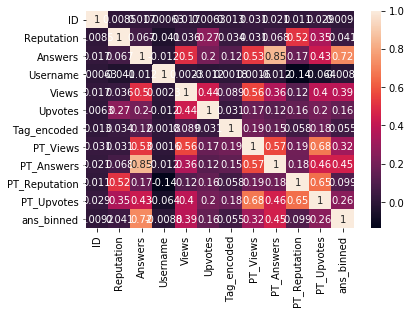

In [234]:
sns.heatmap(train.corr(),annot=True);

# Train Test Split:

In [250]:
from sklearn.model_selection import train_test_split
x=train[['Views','Reputation','Answers','Tag_encoded']]
y=train['Upvotes']
mtest=test[['Views','Reputation','Answers','Tag_encoded']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=100)

## Scaling Features:

In [221]:
from sklearn.preprocessing import StandardScaler

In [252]:
ss=StandardScaler()
scaled_xtrain=pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
scaled_xtest=pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [253]:
ss=StandardScaler()
scaled_x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
scaled_mtest=pd.DataFrame(ss.transform(mtest),columns=mtest.columns)

C:\Users\deep\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\deep\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\deep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Modelling:

## Linear Regression:

In [254]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [255]:
from sklearn.metrics import mean_squared_error

In [256]:
lr=LinearRegression()
lr.fit(scaled_xtrain,ytrain)
ypred=lr.predict(scaled_xtest)
np.sqrt(mean_squared_error(ytest,ypred))

2345.914943801183

## polynomial Regression:

In [257]:
from sklearn.preprocessing import PolynomialFeatures

In [258]:
poly=PolynomialFeatures(degree=2)
poly_xtrain=poly.fit_transform(scaled_xtrain)
poly_xtest=poly.fit_transform(scaled_xtest)
lr=LinearRegression()
lr.fit(poly_xtrain,ytrain)
ypred=lr.predict(poly_xtest)
np.sqrt(mean_squared_error(ytest,ypred))

801.0289387414193

### Running in the test data and saving final output:

In [259]:
poly=PolynomialFeatures(degree=2)
poly_xtrain=poly.fit_transform(scaled_x)
poly_xtest=poly.transform(scaled_mtest)
lr=LinearRegression()
lr.fit(poly_xtrain,y)
ypred=lr.predict(poly_xtest)
test['Upvotes']=ypred
output=test[['ID','Upvotes']]
output.to_csv('output.csv',index=False)